In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [3]:
hrt = pd.read_csv('/content/heart_cleveland_upload.csv')

In [4]:
hrt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
hrt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [6]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


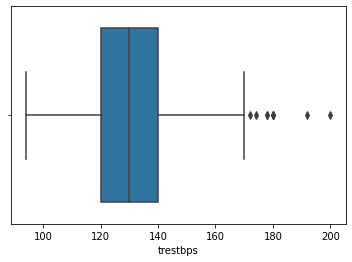

In [7]:
sns.boxplot(hrt['trestbps'])


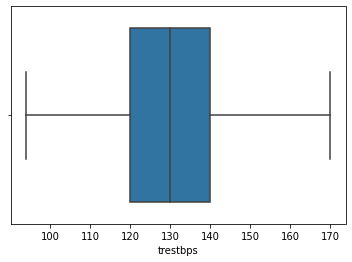

In [10]:
hrt = hrt.drop(hrt[(hrt['trestbps']>170)].index)
sns.boxplot(x='trestbps',data=hrt)

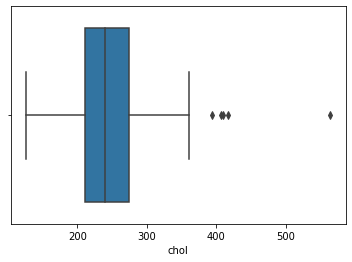

In [13]:
sns.boxplot(x='chol',data=hrt)


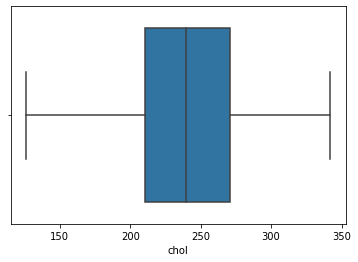

In [14]:
hrt = hrt.drop(hrt[(hrt['chol']>350)].index)
sns.boxplot(x='chol',data=hrt)

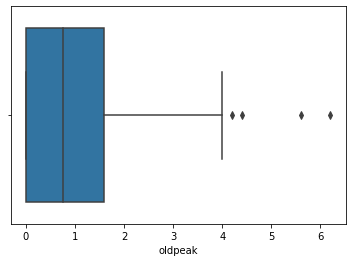

In [15]:
sns.boxplot(x='oldpeak',data=hrt)


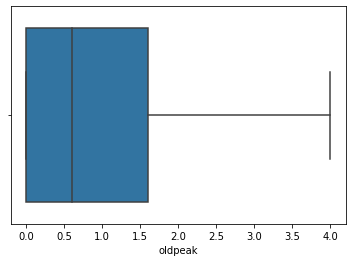

In [16]:
hrt = hrt.drop(hrt[(hrt['oldpeak']>4)].index)
sns.boxplot(x='oldpeak',data=hrt)

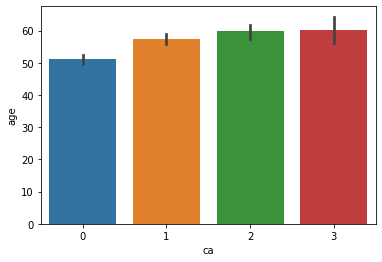

In [17]:
sns.barplot(x=hrt['ca'], y=hrt['age'], data=hrt)


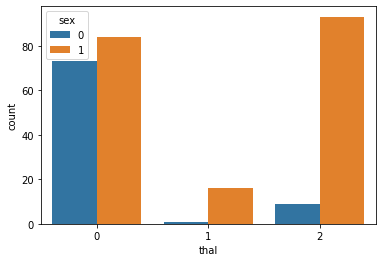

In [19]:
sns.countplot(x='thal', hue='sex',data=hrt)


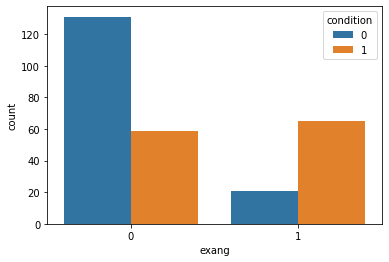

In [20]:
sns.countplot(x='exang', hue='condition',data=hrt)


<Figure size 576x1440 with 0 Axes>

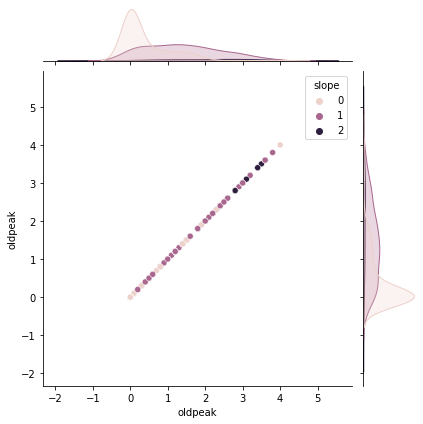

In [21]:
plt.figure(figsize=(8,20))
sns.jointplot(data=hrt, x='oldpeak',y='oldpeak', hue='slope')
plt.show()

<Figure size 576x1440 with 0 Axes>

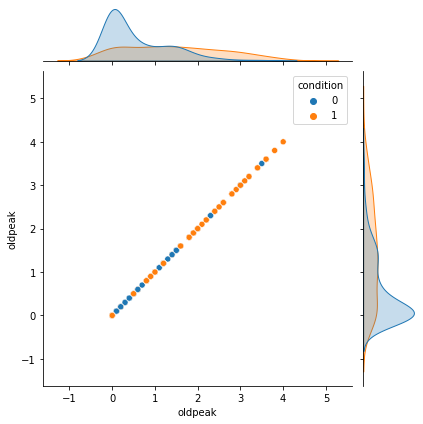

In [22]:
plt.figure(figsize=(8,20))
sns.jointplot(data=hrt, x='oldpeak',y='oldpeak', hue='condition')
plt.show()

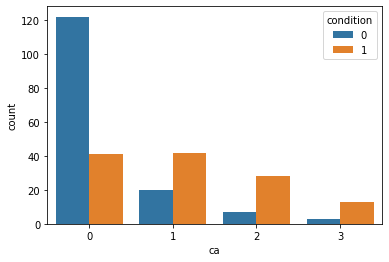

In [23]:
sns.countplot(x='ca', hue='condition',data=hrt)


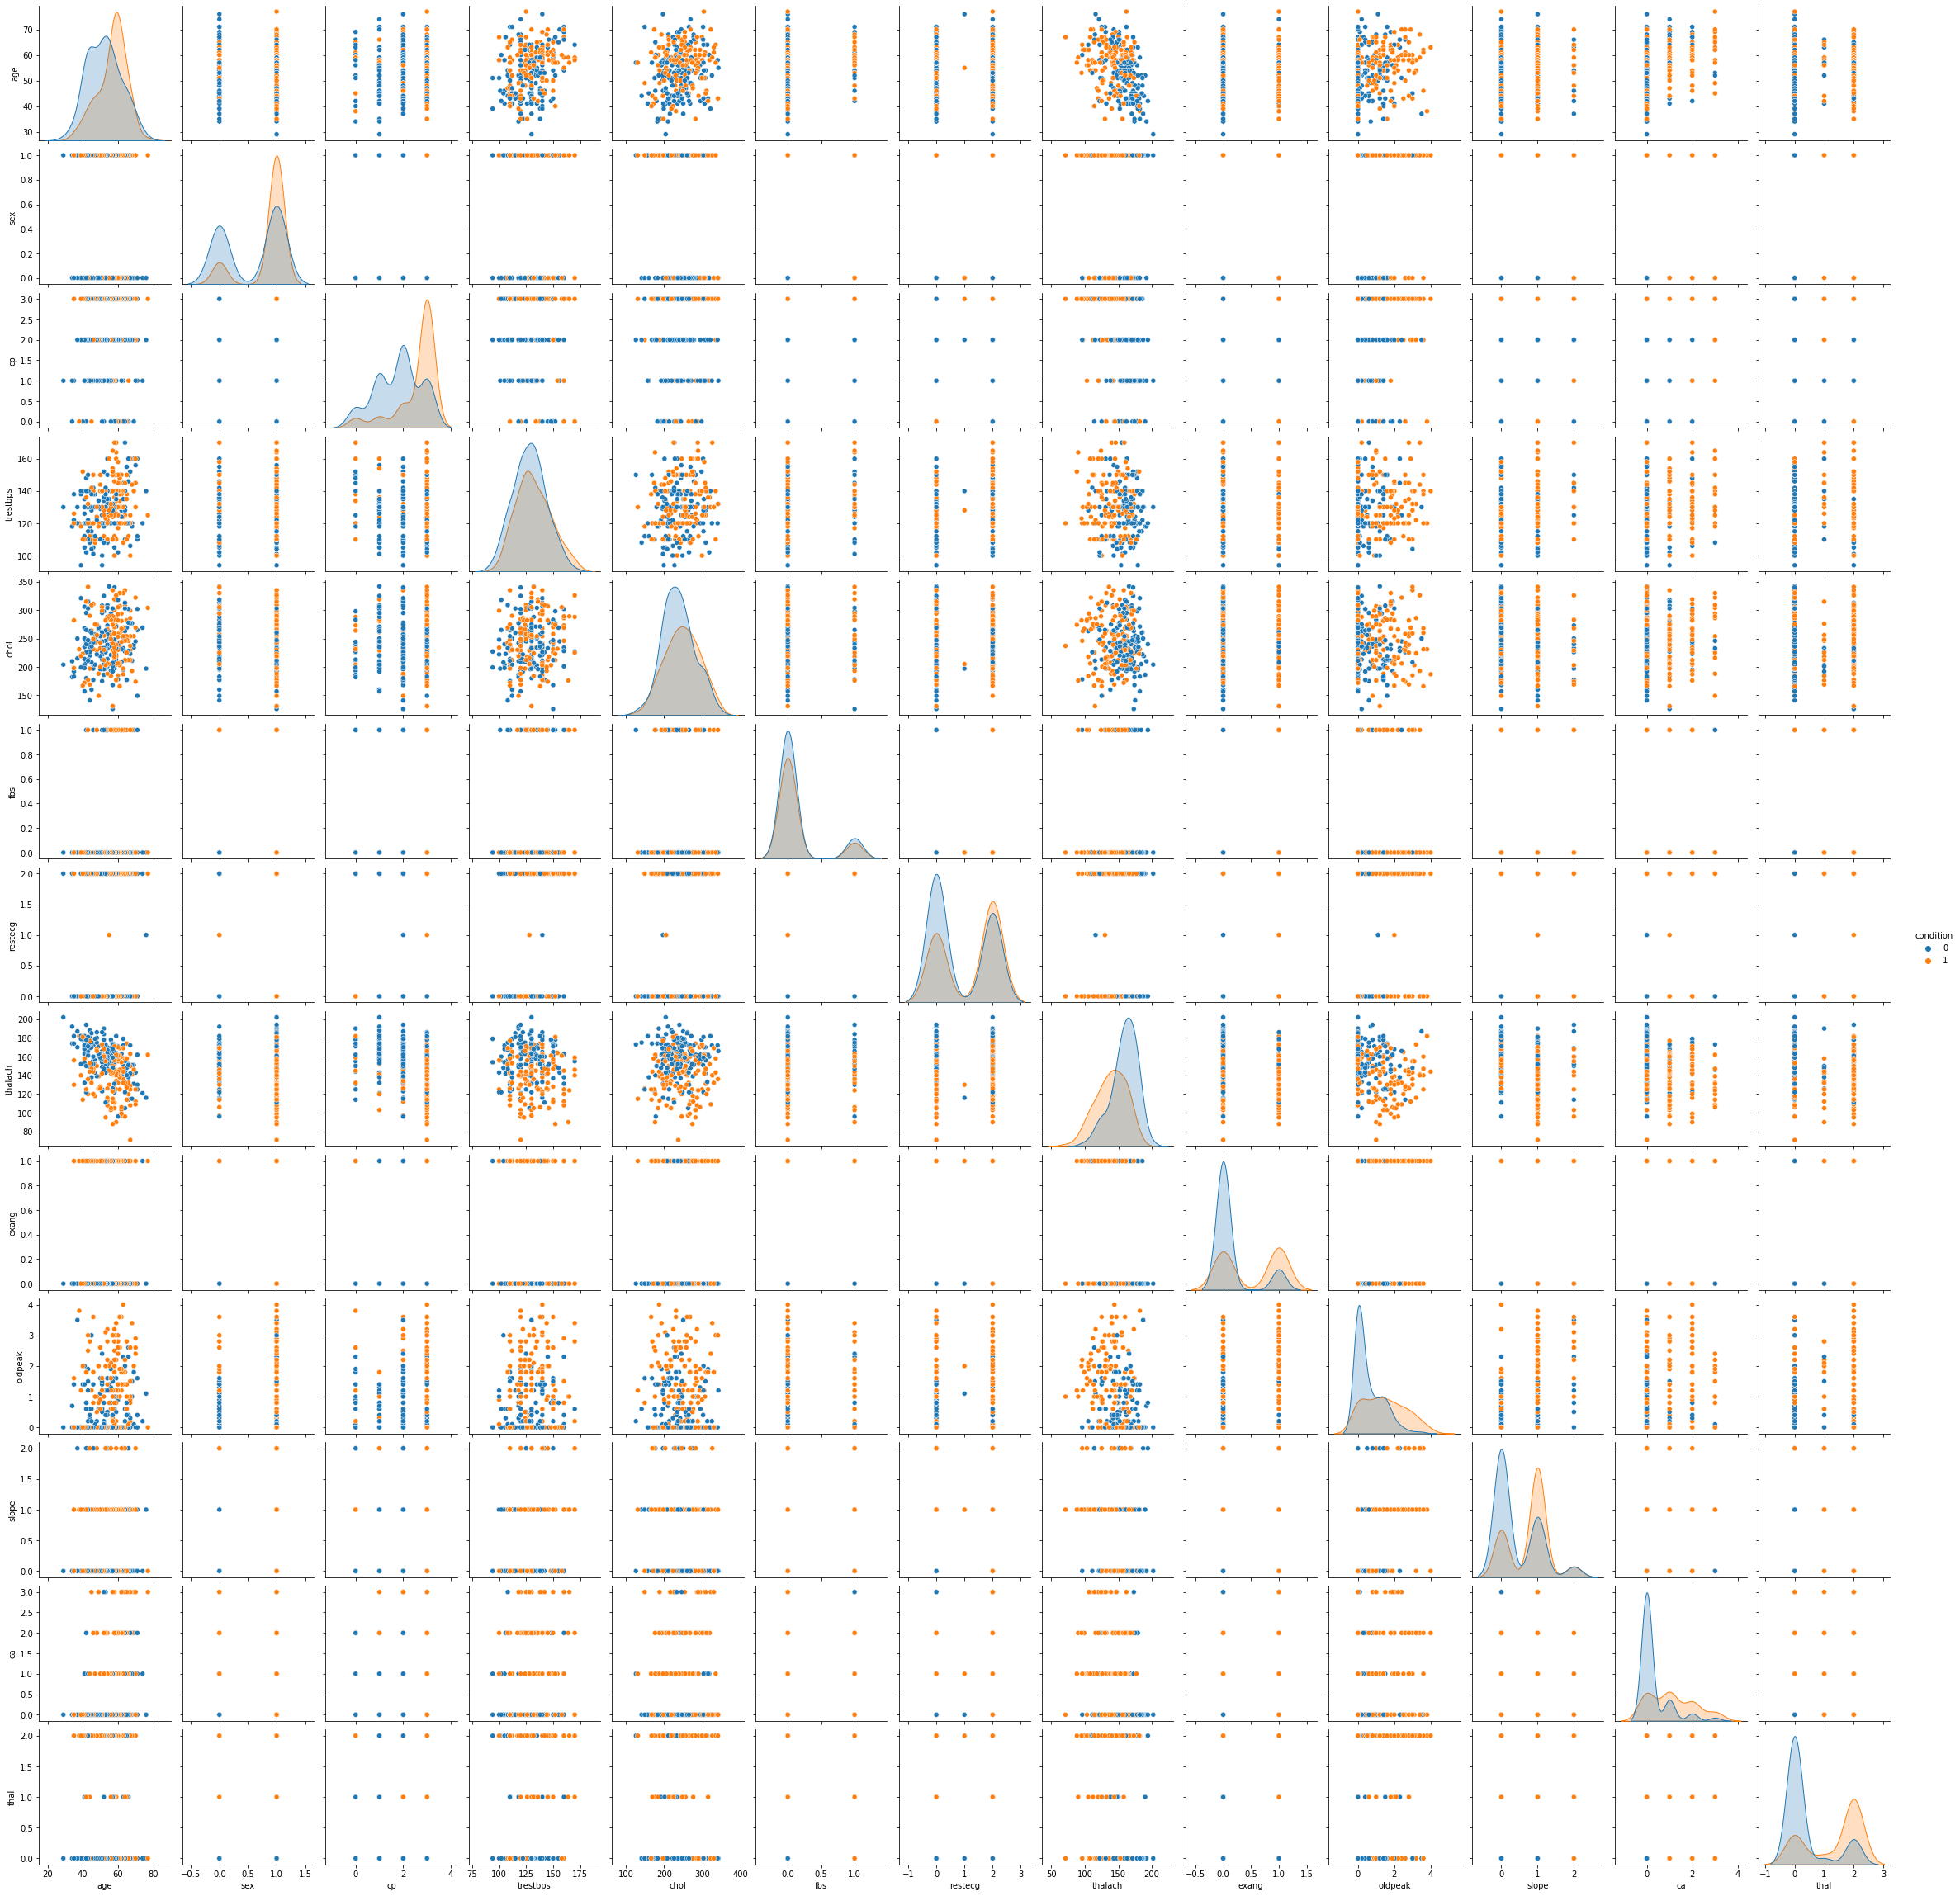

In [24]:
sns.pairplot(hrt,hue='condition')


In [25]:
x = hrt.drop('condition', axis=1)
y = hrt['condition']

x.shape, y.shape

((276, 13), (276,))

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4, shuffle=True)

In [27]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors=22)
knn_classifier.fit(x_train_std, y_train)

KNeighborsClassifier(n_neighbors=22)

In [29]:
y_pred_knn = knn_classifier.predict(x_test_std)

In [30]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
print(knn_cm)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(knn_acc)

[[32  3]
 [ 7 14]]
0.8214285714285714


In [31]:
print("Accuracy on training set: {:.3f}".format(knn_classifier.score(x_train_std, y_train)))
print("Accuracy on testing set: {:.3f}".format(knn_classifier.score(x_test_std, y_test)))

Accuracy on training set: 0.841
Accuracy on testing set: 0.821


In [32]:
knn_test = knn_classifier.score(x_test_std, y_test)


In [33]:
scores = []
for k in range(1,30):
    knn = KNeighborsClassifier(k).fit(x_train_std, y_train)
    scores.append(knn.score(x_train_std, y_train))

print(scores, end = " ")

[1.0, 0.85, 0.8954545454545455, 0.8545454545454545, 0.8545454545454545, 0.85, 0.8363636363636363, 0.8454545454545455, 0.8409090909090909, 0.8363636363636363, 0.8272727272727273, 0.8318181818181818, 0.8454545454545455, 0.8454545454545455, 0.8636363636363636, 0.8409090909090909, 0.8545454545454545, 0.8454545454545455, 0.8454545454545455, 0.85, 0.8545454545454545, 0.8409090909090909, 0.8363636363636363, 0.8409090909090909, 0.8318181818181818, 0.8272727272727273, 0.8272727272727273, 0.8318181818181818, 0.8363636363636363] 

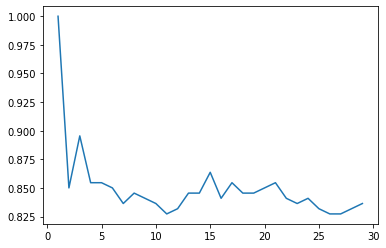

In [34]:
plt.plot(np.arange(1,30), scores)


In [35]:
dt_class = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_class.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred_dt = dt_class.predict(x_test)
print(y_pred_dt)

[1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1]


In [37]:
dt_cm = confusion_matrix(y_test,y_pred_dt)
print(dt_cm)
dt_acc = accuracy_score(y_test,y_pred_dt)
print(dt_acc)

[[23 12]
 [ 4 17]]
0.7142857142857143


In [38]:
print("Accuracy on Training set: {:.3f}".format(dt_class.score(x_train,y_train)))
print("Accuracy on Test set: {:.3f}".format(dt_class.score(x_test,y_test)))
dt_test = dt_class.score(x_test,y_test)

Accuracy on Training set: 1.000
Accuracy on Test set: 0.714


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


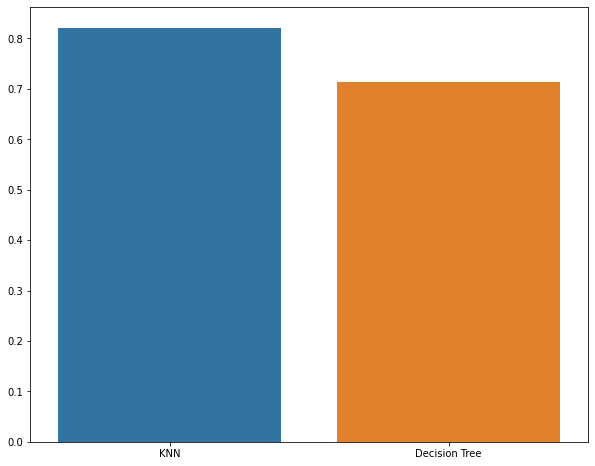

In [39]:
algorithms = ['KNN','Decision Tree']
scores = [knn_test, dt_test]
plt.figure(figsize=(10,8))
sns.barplot(algorithms, scores)